# Técnicas de Inteligencia Artificial - Introducción a Arboles de Decisión con Python

Para poder trabajar con Python de forma rápida, sencilla y desde cualquier computadora vamos a utilizar este entorno de programación llamado Google Colaboratory o, simplemente Colab, el cual es un servicio que forma parte de los servicios Cloud de Google. 
Colab está basado en los entornos Jupyter Notebooks, los cuales nos permiten escribir y ejecutar código en Python en diferentes celdas sin un orden fijo, al igual que Matlab. Además, los Notebooks de Jupyter permiten intercalar celdas de texto (como esta que estas leyendo) donde se puede complementar con información, agregar fórmulas mediante Latex, insertar imágenes o gráficas, entre otras. 

Para trabajar con árboles de decisión en Python vamos a utilizar la librería [SciKit-Learn](https://scikit-learn.org/stable/index.html). Esta librería implementa una gran variedad de algoritmos de aprendizaje automatizado junto con herramientas para su entrenamiento, refinamiento y validación; conjuntos de datos y algoritmos para su pre-procesamiento, entre otras. SciKit-Learn es ampliamente utilizada en ambientes científicos y de investigación, así como también en la industria principalmente debido a su potencia y simplicidad.

Esta librería, al igual que muchas otras, ya se encuentran instaladas por defecto en Colab.

---


## Preparación del conjunto de datos

Como se mencionó anteriormente, SciKit-Learn trae incorporados varios conjuntos de datos comunmente utilizados en problemas básicos de aprendizaje automatizado. Todos ellos se encuentran en el módulo [`datasets`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) de la librería. A continuación importamos la función [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) que permite cargar el dataset [Iris](https://archive.ics.uci.edu/ml/datasets/iris) e imprimimos algunos datos sobre el mismo.

Este dataset consiste de datos correspondientes a 3 variedades de flor de Iris. Cada elemento del dataset esta representado por 4 atributos (ancho y largo del pétalo y del sépalo de la flor). En total el dataset consta de 50 ejemplos de cada una de las clases.

In [1]:
from sklearn.datasets import load_digits

dataset = load_digits()
dataset.target_names = list(map(str, dataset.target_names))

# Imprimo informacion para analizar el conjunto de datos
 
print("Los atributos de entrada son: {}.".format(dataset.feature_names))
print("Las clases que intentaremos predecir son: {}.".format(dataset.target_names))
print("El formato de la matriz de datos es: {}.".format(dataset.data.shape))
print("El formato de la matriz de eitquetas es: {}.".format(dataset.target.shape))

Los atributos de entrada son: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'].
Las clases que intentaremos predecir son: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'].
El formato de la matriz de datos es: (1797

## Conjunto de entrenamiento y evaluación

Una vez cargado el dataset, podemos generar subconjuntos del mismo para el entrenamiento y evaluación del modelo. 

Para ello, hacemos uso de la función [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) del módulo [`model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).


In [3]:
# Divido los datos en conjunto de entrenamiento y evaluacion
from sklearn.model_selection import train_test_split
 
data_train, data_test, target_train, target_test = train_test_split(dataset.data,
                                                                    dataset.target,
                                                                    test_size = 0.2)
 
print("Ahora, el conjunto de entrenamiento tiene {} muestras y el de evaluación tiene {} muestras.".format(data_train.shape[0], data_test.shape[0]))

Ahora, el conjunto de entrenamiento tiene 1437 muestras y el de evaluación tiene 360 muestras.


## Arbol de Decisión

Para crear, entrenar y evaluar un árbol de decisión utilizamos la clase [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) del módulo [`tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Al momento de crear el árbol, la función nos permite configurar distintos parámetros, entre los que se encuentran:

*  `criterion`: Cadena de texto que puede tomar dos valores: `"gini"` o `"entropy"`. Este parámetro establece el criterio de optimización para determinar cual sera el atributo a utilizar para dividir un nodo y su valor de corte.
*  `max_depth`: Número entero indicando la profundidad máxima que puede adoptar el árbol. Si se lo deja en `None` el árbol se expandira hasta que todas las hojas sean puras, o hasta que todas las hojas contengan menos muestras que `min_samples_leaf`.
*  `min_samples_split`: Número entero indicando la cantidad mínima de muestras necesaria para dividir un nodo en dos nuevos nodos y/o hojas.
*  `min_samples_leaf`: Número entero indicando la cantidad mínima de ejemplos necesaria para formar un nodo hoja. Se va a considerar la separación de un nodo en hojas solo si quedan, al menos `min_samples_leaf` ejemplos de entrenamiento, en cada una de las ramas que se derivan.
*  `max_leaf_nodes`: Número entero indicando la cantidad máxima de hojas que puede tener el árbol.

Mediante estos parámetros somos capaces de controlar las reglas de parada en el entrenamiento del modelo, con el fin de evitar el sobreentrenamiento del mismo. 

In [4]:
# Definicion de parametros para el entrenamiento del arbol de decision
criterion = 'gini'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
max_leaf_nodes = None

In [5]:
# Creamos el modelo y lo entrenamos
from sklearn.tree import DecisionTreeClassifier
 
tree_model = DecisionTreeClassifier(criterion = criterion,
                                    splitter = "best",
                                    max_depth = max_depth,
                                    min_samples_leaf = min_samples_leaf,
                                    min_samples_split = min_samples_split,
                                    max_leaf_nodes = max_leaf_nodes)
 
# Utilizamos el conjunto de datos de entrenamiento
 
tree_model.fit(data_train, target_train)

DecisionTreeClassifier()

## Graficar la estructura del árbol

Para poder graficar el árbol obtenido, su estructura de ramas y hojas, y algunos valores obtenidos luego del entrenamiento, tenemos dos opciones:

1.   Utilizar la función [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) del mismo modulo `tree`.
2.   Utilizar la función `graph_tree` implementada a continuación.



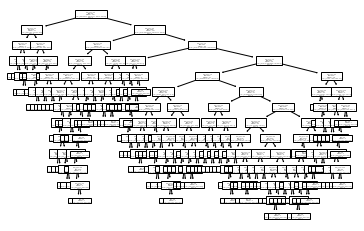

In [6]:
from sklearn.tree import plot_tree
 
_ = plot_tree(tree_model, feature_names=dataset.feature_names, class_names=dataset.target_names)

In [7]:
import graphviz
from sklearn import tree
 
# Funcion para generar en gráfico del arbol.
 
# NOTA: Para reutilizar esta funcion en otro Notebook hay que importar los mismos paquetes que se
# importan en esta celda.
def graph_tree(tree_model, feature_names=None, class_names=None):
 
  dot_data = tree.export_graphviz(tree_model, out_file=None,
                                  feature_names=feature_names,
                                  class_names=class_names,
                                  filled=True,
                                  rounded=True,
                                  special_characters=True)  
 
  graph = graphviz.Source(dot_data)
  return graph

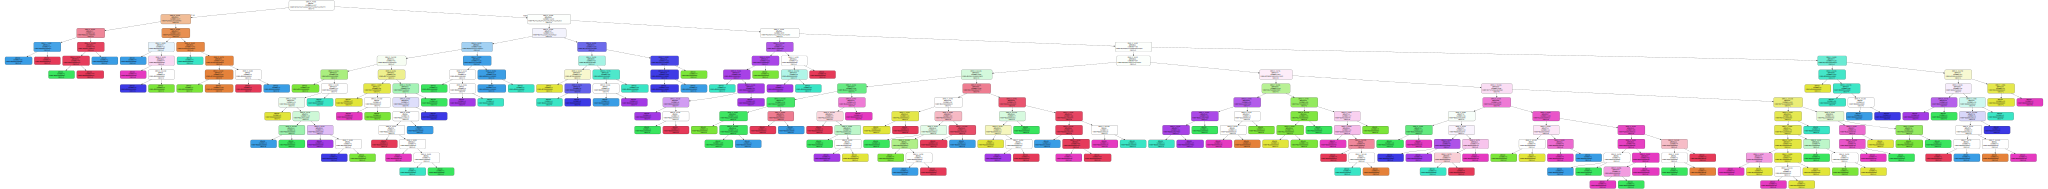

In [8]:
graph = graph_tree(tree_model, dataset.feature_names, dataset.target_names)
graph

## Evaluación
Para evaluar la performance del modelo entrenado sobre los datos vamos a utilizar la métrica de accuracy, definida por la siguiente expresión:

$accuracy(y,\hat y)=\frac {1}{n_{samples}} \displaystyle\sum_{i=0}^{n_{samples}-1}1(\hat y_i=y_i)$

Donde $\hat y_i$ es el valor predicho en la $i$_esima muestra y $y_i$ es el valor correcto que se debe predecir.

Podemos calcular esta métrica mediante la función [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) del módulo [`metrics`](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics). Para ello haremos una predicción, con el modelo ya entrenado, sobre los datos del conjunto de evaluación.

In [9]:
from sklearn.metrics import accuracy_score

# Utilizo el conjunto de evaluación data_test para predecir mediante el arbol ya entrenado
target_predicted = tree_model.predict(data_test)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_test, target_predicted)

print("El valor de accuracy obtenido es: {}".format(accuracy))

El valor de accuracy obtenido es: 0.8638888888888889


Pero, ¿Qué pasa si evalúo el mismo árbol sobre el conjunto de entrenamiento?...

## Sobreentrenamiento

El sobreentrenamiento (overfitting) es el mayor obstáculo a la hora de entrenar un árbol de decisión, y casi cualquier modelo en aprendizaje automatizado. Si los hiperparametros no se ajustan correctamente el árbol crecerá excesivamente, lo cual puede resultar en un 100% de precisión sobre el conjunto de datos de entrenamiento, siendo el peor de los casos aquel en el que cada observación de dicho conjunto genere una hoja propia.

In [10]:
# Chequeamos si el árbol esta sobreentrenado evaluandolo con algunos datos del conjunto de entrenamiento

target_predicted = tree_model.predict(data_train)

train_accuracy = accuracy_score(target_train, target_predicted)

print("El valor de accuracy obtenido es: {}".format(train_accuracy))

El valor de accuracy obtenido es: 1.0


### Ajustar las restricciones (pre-prunning)

Una de las formas en las que se puede evitar el sobreentrenamiento de estos modelos es mediante el ajuste minusioso de sus hiperparametros, de forma tal que limiten el crecimiento del árbol y, por lo tanto, su sobreentrenamiento. 

Algunos ejemplos de limitaciones podrían ser:

*   Reducir la profundidad máxima que puede alcanzar.
*   Aumentar la cantidad de observaciones necesarias para que un nodo se pueda considerar como hoja.
*   Reducir la cantidad máxima de hojas que puede generar el árbol
*   Aumentar la cantidad de observaciones necesarias para que un nodo pueda separarse en dos nuevos nodos/hojas.


### Poda (post-prunning)

La forma mas comun y efectiva de combatir el sobreentrenamiento en los árboles de decisión es la poda. El proceso de poda de un árbol de decisión consiste en eliminar subsecciones del mismo, transformandolas en nodos hojas que representen la clase mas común de los ejemplos de entrenamiento mas utilizados en esa subsección. Se considera, entonces, que las subsecciones eliminadas no representaban información critica, por lo que no permitian la generalización del conocimiento por parte del modelo.

A continuación se implementa una función de poda, cuyo funcionamiento es similar a la de Matlab. A esta función se le pasa como argumento el modelo de árbol que se desea podar y la cantidad de niveles que se le quieren sacar y devolverá el árbol podado.



In [11]:
from sklearn.tree._tree import TREE_LEAF
from copy import deepcopy

# Funcion para podar un árbol.

# NOTA: Para reutilizar esta función en otra Notebook hay que importar los mismos paquetes que se
# importan en esta celda.

def is_leaf(tree_model, node_id):
  """
  Devuelve True si el nodo (node_id), pasado como
  argumento, es un nodo hoja del arbol (tree_model).
  Caso contrario retorna False.
  """
  return (tree_model.tree_.children_left[node_id] == TREE_LEAF and 
          tree_model.tree_.children_right[node_id] == TREE_LEAF)


def prune(tree_model, levels=1):
  """
  Realiza la poda del arbol pasado como argumento, de forma recursiva, eliminando niveles del mismo.

  Esta funcion replica el funcionamiento de su correspondiente par en Matlab:

          prune(tree_model, 'level', levels)
  """
  tree_model_copy = deepcopy(tree_model)

  def recursive(tree_model, node_id):

    if (is_leaf(tree_model, tree_model.tree_.children_left[node_id]) and
        is_leaf(tree_model, tree_model.tree_.children_right[node_id])):
      tree_model.tree_.children_left[node_id] = TREE_LEAF
      tree_model.tree_.children_right[node_id] = TREE_LEAF
    
    if tree_model.tree_.children_left[node_id] != TREE_LEAF:
      recursive(tree_model, tree_model.tree_.children_left[node_id])
      recursive(tree_model, tree_model.tree_.children_right[node_id])
      
    return tree_model
  
  for _ in range(levels):
    tree_model_copy = recursive(tree_model_copy, 0)

  return tree_model_copy

Valor de prunning usado: 0 
El valor de accuracy obtenido en el conjunto de evaluacion es: 0.8638888888888889 
El valor de accuracy obtenido en el conjunto de entrenamiento es: 1.0
Valor de prunning usado: 1 
El valor de accuracy obtenido en el conjunto de evaluacion es: 0.8694444444444445 
El valor de accuracy obtenido en el conjunto de entrenamiento es: 0.9603340292275574
Valor de prunning usado: 2 
El valor de accuracy obtenido en el conjunto de evaluacion es: 0.8638888888888889 
El valor de accuracy obtenido en el conjunto de entrenamiento es: 0.9255393180236604
Valor de prunning usado: 3 
El valor de accuracy obtenido en el conjunto de evaluacion es: 0.8388888888888889 
El valor de accuracy obtenido en el conjunto de entrenamiento es: 0.8775226165622826
Valor de prunning usado: 4 
El valor de accuracy obtenido en el conjunto de evaluacion es: 0.8111111111111111 
El valor de accuracy obtenido en el conjunto de entrenamiento es: 0.8427279053583855
Valor de prunning usado: 5 
El valo

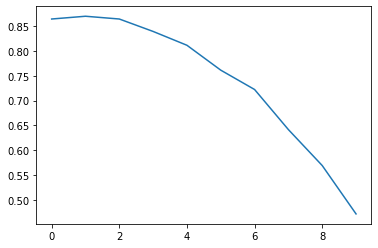

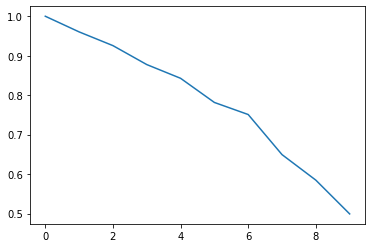

In [13]:
# Podo el árbol y lo grafico nuevamente

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import plot, show

pruned_tree_model = prune(tree_model, 4)
max_tree_height = 10

min_samples_split_values = list(range(0, max_tree_height))
accuracy_values = []
accuracy_test_values = []

# Realizo un for loop donde podo el arbol con distintos valores de profundidad final.
# Además, imprimos las exactitudes sobre los conjuntos de entrenamiento y evaluación.

for value in min_samples_split_values:
  print("Valor de prunning usado: {} ".format(value))
  pruned_tree_model = prune(tree_model, value)
  target_predicted = pruned_tree_model.predict(data_test)

  test_accuracy = accuracy_score(target_test, target_predicted)

  print("El valor de accuracy obtenido en el conjunto de evaluacion es: {} ".format(test_accuracy))

  target_predicted = pruned_tree_model.predict(data_train)

  test_accuracy2 = accuracy_score(target_train, target_predicted)

  print("El valor de accuracy obtenido en el conjunto de entrenamiento es: {}".format(test_accuracy2))

  accuracy_values.append(test_accuracy)
  accuracy_test_values.append(test_accuracy2)

# Finalmente grafico las exactitudes para que puedan ser visualizadas.

plot(min_samples_split_values, accuracy_values)
show()
plot(min_samples_split_values, accuracy_test_values)
show()

## Análisis de Hiperparametros

Una forma simple pero efectiva de analizar como se comporta un modelo ante distintos valores de un cierto hiperparametro consiste en entrenar varias veces el mismo modelo, variando el hiperparametro que se desea analizar, y graficando el comportamiento el modelo luego de cada entrenamiento, en funcion del valor del hiperparametro utilizado. 

En la siguiente celda de código se entranará un árbol de decisíon variando el valor de `min_samples_split` desde 2 hasta 10, y se graficará el valor de accuracy obtenido sobre el conjunto de testeo, en función de los asignados a `min_samples_split`.

Para poder generar una gráfica utilizamos la función [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) de la librería [matplotlib](https://matplotlib.org/).

In [15]:
from numpy.ma.core import append
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import plot, show

# Definicion de parametros para el entrenamiento del arbol de decision
criterion = 'gini'

# Definimos todos los hiperparámetros a variar.
max_depth_values = list(range(6,14))
min_samples_split_values = list(range(2, 10))
min_samples_leaf_values = list(range(1,5))
total_leaf_nodes_values = 0

train_accuracy_values = []
test_accuracy_values = []
very_good_values = []

# Ahora, realizamos loops para crear todas las posibles combinaciones de hiperparámetros.
# Esta ejecución lleva unos cuantos minutos.
for max_depth in max_depth_values:
  max_leaf_nodes_values = list(range(15,max_depth * 6))
  total_leaf_nodes_values += len(max_leaf_nodes_values)
  for min_samples_split in min_samples_split_values:
    for min_samples_leaf in min_samples_leaf_values:
      for max_leaf_nodes in max_leaf_nodes_values:
        tree_model = DecisionTreeClassifier(criterion = criterion,
                                            splitter = "best",
                                            max_depth = max_depth,
                                            min_samples_leaf = min_samples_leaf,
                                            min_samples_split = min_samples_split,
                                            max_leaf_nodes = max_leaf_nodes)
        tree_model.fit(data_train, target_train)
        predicted_values = tree_model.predict(data_test)
        accuracy = accuracy_score(target_test, predicted_values)

        test_accuracy_values.append(accuracy)

        predicted_values2 = tree_model.predict(data_train)
        accuracy2 = accuracy_score(target_train, predicted_values2)

        train_accuracy_values.append(accuracy2)
        very_good_values.append((max_depth,min_samples_split, min_samples_leaf, max_leaf_nodes))


accuracy_delta = []
for value in range(0, len(train_accuracy_values)):
  accuracy_delta.append(abs(train_accuracy_values[value] - test_accuracy_values[value]))

approval_list = []
counter = 0
for value in range(0, len(train_accuracy_values)):
  if (test_accuracy_values[value] >= 0.8 and accuracy_delta[value] <= 0.05):
    approval_list.append((value, train_accuracy_values[value], test_accuracy_values[value], accuracy_delta[value], very_good_values[value]))
    counter += 1

# Si se encontraron valores muy buenos, se los imprime en este punto
print("Lista de valores que son muy buenos para un arbol:")
print(approval_list)

Lista de valores que son muy buenos para un arbol:
[(680, 0.8385525400139179, 0.8027777777777778, 0.03577476223614007, (7, 2, 1, 23)), (681, 0.8399443284620738, 0.8, 0.03994432846207374, (7, 2, 1, 24)), (682, 0.8441196938065414, 0.8, 0.04411969380654135, (7, 2, 1, 25)), (683, 0.8469032707028532, 0.8083333333333333, 0.03856993736951986, (7, 2, 1, 26)), (684, 0.8503827418232429, 0.8083333333333333, 0.04204940848990957, (7, 2, 1, 27)), (685, 0.8524704244954767, 0.8083333333333333, 0.04413709116214337, (7, 2, 1, 28)), (686, 0.8559498956158664, 0.8083333333333333, 0.04761656228253308, (7, 2, 1, 29)), (687, 0.8594293667362561, 0.8111111111111111, 0.048318255625145023, (7, 2, 1, 30)), (688, 0.860125260960334, 0.8111111111111111, 0.04901414984922292, (7, 2, 1, 31)), (689, 0.8615170494084899, 0.8138888888888889, 0.04762816051960106, (7, 2, 1, 32)), (693, 0.8705636743215032, 0.825, 0.04556367432150321, (7, 2, 1, 36)), (694, 0.872651356993737, 0.825, 0.047651356993737015, (7, 2, 1, 37)), (695, 0.

## Evaluación de modificación de Hiperparámetros

En esta sección, evaluamos los resultados de los valores calculados en la sección anterior. 

Lista de valores que son muy buenos para un arbol:
[(680, 0.8385525400139179, 0.8027777777777778, 0.03577476223614007, (7, 2, 1, 23)), (681, 0.8399443284620738, 0.8, 0.03994432846207374, (7, 2, 1, 24)), (682, 0.8441196938065414, 0.8, 0.04411969380654135, (7, 2, 1, 25)), (683, 0.8469032707028532, 0.8083333333333333, 0.03856993736951986, (7, 2, 1, 26)), (684, 0.8503827418232429, 0.8083333333333333, 0.04204940848990957, (7, 2, 1, 27)), (685, 0.8524704244954767, 0.8083333333333333, 0.04413709116214337, (7, 2, 1, 28)), (686, 0.8559498956158664, 0.8083333333333333, 0.04761656228253308, (7, 2, 1, 29)), (687, 0.8594293667362561, 0.8111111111111111, 0.048318255625145023, (7, 2, 1, 30)), (688, 0.860125260960334, 0.8111111111111111, 0.04901414984922292, (7, 2, 1, 31)), (689, 0.8615170494084899, 0.8138888888888889, 0.04762816051960106, (7, 2, 1, 32)), (693, 0.8705636743215032, 0.825, 0.04556367432150321, (7, 2, 1, 36)), (694, 0.872651356993737, 0.825, 0.047651356993737015, (7, 2, 1, 37)), (695, 0.

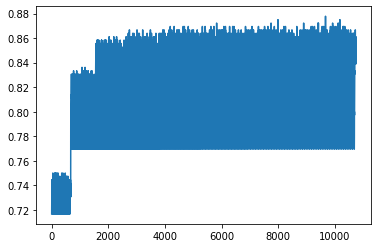

Plot de exactitud sobre conjunto de entrenamiento dada iteración


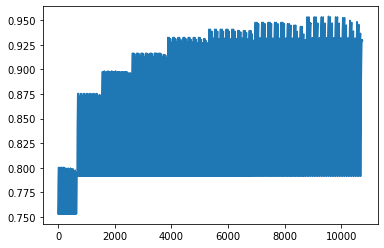

Plot de delta entre conjunto de evaluación y entrenamiento dada iteración


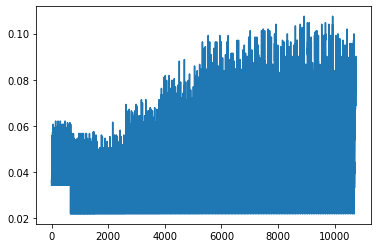

Plot de exactitud sobre conjunto de evaluación sin sobreentrenamiento, duplicados y ordenado por ponderación


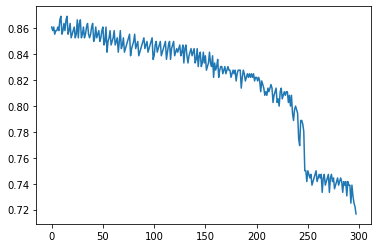

Plot de delta entre conjunto de evaluación y entrenamiento, sin sobreentrenamiento, duplicados y ordenado por ponderación


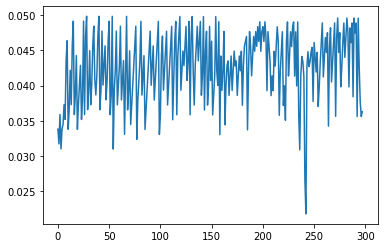

Para acc_test: 0.8611111111111112, delta: 0.033808861053119865, los hyperparametros son: (8, 6, 4, 46) 
Para acc_test: 0.8583333333333333, delta: 0.03171537926235213, los hyperparametros son: (8, 2, 3, 41) 
Para acc_test: 0.8611111111111112, delta: 0.03589654372535367, los hyperparametros son: (8, 7, 3, 46) 
Para acc_test: 0.8555555555555555, delta: 0.031013685919740186, los hyperparametros son: (8, 4, 4, 39) 
Para acc_test: 0.8583333333333333, delta: 0.03380306193458604, los hyperparametros son: (8, 8, 3, 42) 
Para acc_test: 0.8583333333333333, delta: 0.03449895615866394, los hyperparametros son: (8, 7, 2, 43) 
Para acc_test: 0.8611111111111112, delta: 0.037288332173509575, los hyperparametros son: (8, 5, 3, 47) 
Para acc_test: 0.8583333333333333, delta: 0.03519485038274184, los hyperparametros son: (8, 7, 4, 44) 
Para acc_test: 0.8666666666666667, delta: 0.043562978427279075, los hyperparametros son: (9, 4, 3, 48) 
Para acc_test: 0.8694444444444445, delta: 0.04635235444212482, los hy

In [19]:
# En esta seccion encontramos que valores de hiperparámetros generan buenos resultados --------------------
print("Lista de valores que son muy buenos para un arbol:")
print(approval_list)


# Pondero los valores segun su delta entre conjuntos y su exactitud sobre la evaluación.
compensated_values = []
for value in range(0, len(test_accuracy_values)):
  c_value = 2.0 - (test_accuracy_values[value] - accuracy_delta[value])
  compensated_values.append((c_value, test_accuracy_values[value], train_accuracy_values[value], accuracy_delta[value], value))

# Ordenamos los valores segun sus pesos ponderados.
print("Sorted compensated values")
sorted_values = sorted(compensated_values, key=lambda t: t[0])
print(sorted_values)

# Esta seccion es código obsoleto. No se utilizan estos valores ---
comp_acc = []
comp_delta = []
for value in range(0, len(sorted_values)):
  comp_acc.append(sorted_values[value][1])
  comp_delta.append(sorted_values[value][3])

# Ahora, solo me quedo con los valores con un sobreentrenamiento acotado. Variar la siguiente variable para obtener distintos resultados.
max_delta = 0.05
overtrained_sorted_values = sorted_values

overtrained_indexes = []
for value in range(0, len(sorted_values)):
  if (overtrained_sorted_values[value][3] > max_delta):
    overtrained_indexes.append(value)

for i in sorted(overtrained_indexes, reverse=True):
    del overtrained_sorted_values[i]

# Ahora, borro los elementos duplicados (donde tienen mismo valor ponderado) del array de arboles ordenado.

from operator import itemgetter

def unique_by_key(elements, key=None):
    if key is None:
        # no key: the whole element must be unique
        key = lambda e: e
    return list({key(el): el for el in elements}.values())

overtrained_sorted_values = unique_by_key(overtrained_sorted_values, key=itemgetter(0))

# Imprimo el array de arboles no sobreentrenados, ordenados y sin duplicados.
print("Removed overtrained and repeated sorted compensated values")
print(overtrained_sorted_values)

# Extraigo las variables de delta y exactitud sobre el conjunto de evaluación para que puedan ser graficadas.
overtrained_comp_acc = []
overtrained_comp_delta = []
for value in range(0, len(overtrained_sorted_values)):
  overtrained_comp_acc.append(overtrained_sorted_values[value][1])
  overtrained_comp_delta.append(overtrained_sorted_values[value][3])

print("\n")
# Ploteo las variables de: exactitud sobre conjunto de evaluación, entrenamiento, delta, exactitud sobre conjunto de evaluación no sobreentrenados y sin duplicados y delta de no sobreentrenados y sin duplicados.
print("Plot de exactitud sobre conjunto de evaluación dada iteración")
plot(list(range(0, (len(test_accuracy_values)))), test_accuracy_values)
show()
print("Plot de exactitud sobre conjunto de entrenamiento dada iteración")
plot(list(range(0, (len(train_accuracy_values)))), train_accuracy_values)
show()
print("Plot de delta entre conjunto de evaluación y entrenamiento dada iteración")
plot(list(range(0, (len(accuracy_delta)))), accuracy_delta)
show()
print("Plot de exactitud sobre conjunto de evaluación sin sobreentrenamiento, duplicados y ordenado por ponderación")
plot(list(range(0, (len(overtrained_comp_acc)))), overtrained_comp_acc)
show()
print("Plot de delta entre conjunto de evaluación y entrenamiento, sin sobreentrenamiento, duplicados y ordenado por ponderación")
plot(list(range(0, (len(overtrained_comp_delta)))), overtrained_comp_delta)
show()

# Tambien imprimo por consola los 10 mejores arboles segun su valor ponderado
for value in range(0, 10):
  print("Para acc_test: {}, delta: {}, los hyperparametros son: {} ".format(overtrained_comp_acc[value], overtrained_comp_delta[value], very_good_values[overtrained_sorted_values[value][4]]))

# Fin seccion -----------------------------------------------------------------------------------------

## Validación Cruzada

La validación cruzada (o cross validation) es una técnica ampliamente utilizada en el entrenamiento de modelos de aprendizaje automatizado, que sirve para evaluar la performance de dicho modelo. La forma mas utilizada de validacion cruzada es la de tipo K-Fold. La misma consiste en subdivir el conjunto de entrenamiento en K particiones y repetir el proceso de entrenamiento y evaluación K veces, dejando siempre una partición distinta para la evaluación y entrenando con el resto. El valor final de precisión del modelo será, entonces, el promedio de los valores de precisión obtenidos en cada entrenamiento.

![grid_search_cross_validation.png](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Para poder implementar validación cruzada de tipo K-Fold con SciKit-Learn debemos utilizar la función [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) del modulo [`model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

Lista de valores que son muy buenos para un arbol:
[0.05023196474135938, 0.05789260032475063, 0.057214103456274645, 0.05238923683600094, 0.044067501739735504, 0.04337740663419154, 0.051026443980514924, 0.046862676873115294, 0.0482544653212712, 0.05659939689167248, 0.05729529111575038, 0.05869287868244022, 0.060780561354674134, 0.0580085826954303, 0.06287404314544187, 0.06704940848990959, 0.06775110183252142, 0.06358733472512179, 0.0663709116214336, 0.06359893296218966, 0.07332405474367898, 0.05023196474135938, 0.05789260032475063, 0.057214103456274645, 0.05238923683600094, 0.044067501739735504, 0.04337740663419154, 0.051026443980514924, 0.046862676873115294, 0.0482544653212712, 0.05659939689167248, 0.05729529111575038, 0.05869287868244022, 0.060780561354674134, 0.0580085826954303, 0.06287404314544187, 0.06427163071213182, 0.06775110183252142, 0.06080955694734402, 0.06359313384365584, 0.0691544885177453, 0.07054627696590121, 0.05023196474135938, 0.05789260032475063, 0.057214103456274645

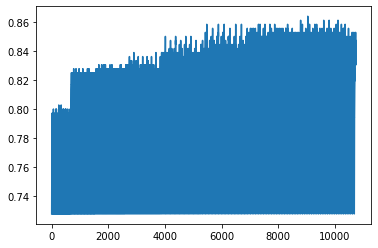

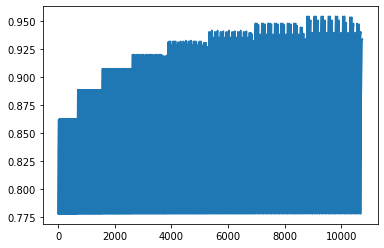

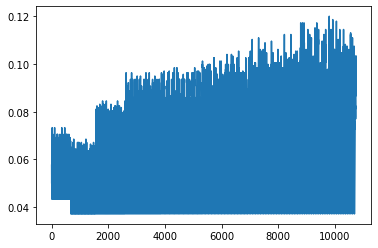

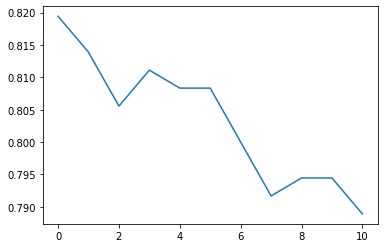

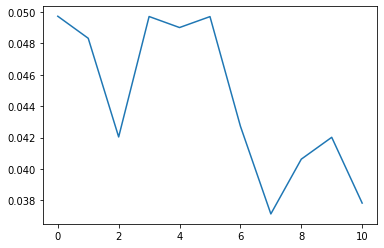

Para acc_test: 0.8194444444444444, delta: 0.04972744142890284, los hyperparametros son: (13, 9, 3, 32) 
Para acc_test: 0.8138888888888889, delta: 0.04832405474367896, los hyperparametros son: (7, 9, 4, 30) 
Para acc_test: 0.8055555555555556, delta: 0.04204360937137552, los hyperparametros son: (13, 9, 4, 26) 
Para acc_test: 0.8111111111111111, delta: 0.04971004407330082, los hyperparametros son: (13, 9, 4, 29) 
Para acc_test: 0.8083333333333333, delta: 0.04900835073068888, los hyperparametros son: (13, 9, 4, 28) 
Para acc_test: 0.8083333333333333, delta: 0.049704244954766885, los hyperparametros son: (7, 9, 4, 29) 
Para acc_test: 0.8, delta: 0.04272790535838544, los hyperparametros son: (13, 9, 4, 25) 
Para acc_test: 0.7916666666666666, delta: 0.03714335421016013, los hyperparametros son: (13, 9, 4, 21) 
Para acc_test: 0.7944444444444444, delta: 0.04062862444908377, los hyperparametros son: (13, 9, 4, 23) 
Para acc_test: 0.7944444444444444, delta: 0.04202041289723968, los hyperparametr

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

K = 10

tree_model = DecisionTreeClassifier()

score = cross_validate(tree_model, dataset.data, dataset.target, cv = K)

print("El valor de accuracy obtenido en el conjunto de datos es: {}".format(score["test_score"].mean()))